# Hierarchical Clustering

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import pickle
import os

from collections import Counter
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing



In [10]:
case = pickle.load(open('Migros/cleaned_data.p','rb'))

In [11]:
linkage_features = ["revenue", "loyalty", "days_since_last_contact", "gender"]


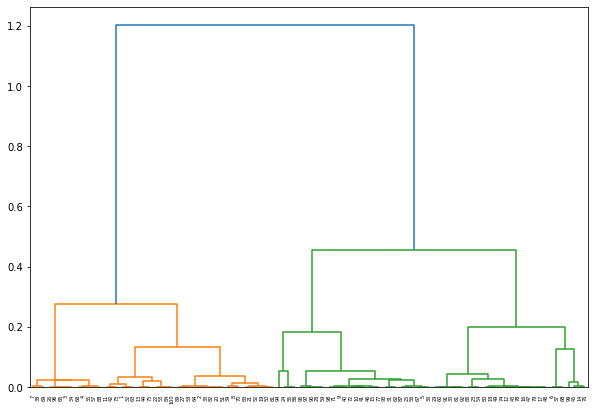

In [12]:
linked = linkage(case[linkage_features],'complete', 'correlation')
labelList = range(1,101)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

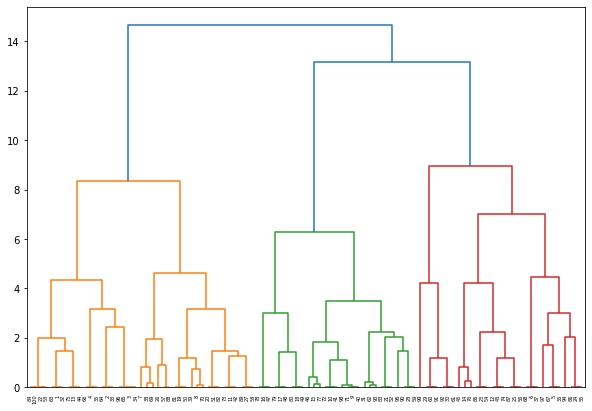

In [75]:
linked = linkage(case[linkage_features],'complete', 'euclidean')
labelList = range(1,101)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [18]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='correlation', linkage='complete')
cluster_assignment = cluster.fit_predict(case[linkage_features])
case["cluster_assignment"] = cluster_assignment

In [37]:
features = [*linkage_features, "cluster_assignment"]

In [64]:
heat_map_df = case[features].sort_values(by=["cluster_assignment", "loyalty" ])
x = heat_map_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [65]:
df.columns = heat_map_df.columns

<AxesSubplot:>

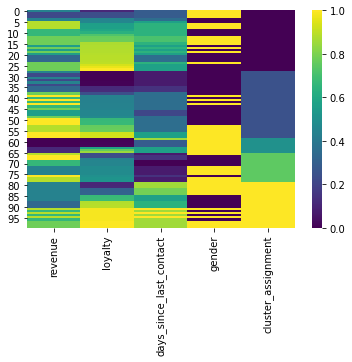

In [77]:
sns.heatmap(df, cmap='viridis')

In [67]:
heat_map_df

,revenue,loyalty,days_since_last_contact,gender,cluster_assignment
93,5,-1.36,4,1,0
85,3,-0.98,4,1,0
54,3,-0.97,4,1,0
23,3,-0.96,4,1,0
96,5,-0.29,5,0,0
...,...,...,...,...,...
77,9,1.36,14,1,4
79,7,1.36,12,0,4
16,8,1.38,12,1,4
47,8,1.38,12,1,4


In [68]:
ix = [heat_map_df.cluster_assignment == x for x in range(5)]

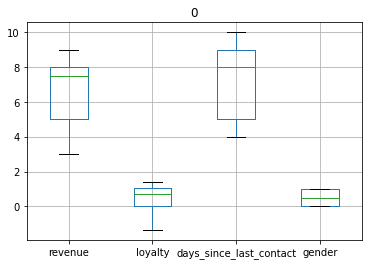

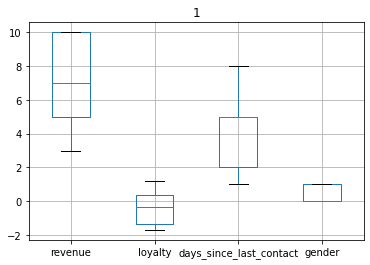

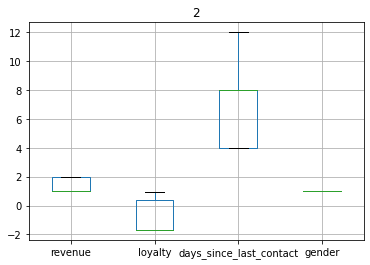

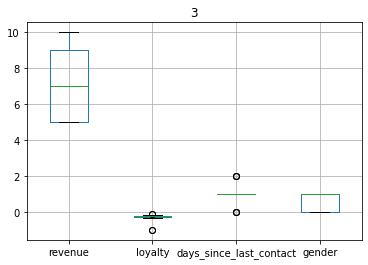

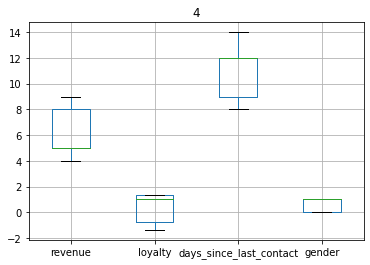

In [69]:
for i,indexer in enumerate(ix):
    heat_map_df[linkage_features][indexer].boxplot()
    plt.title(i)
    plt.show()

In [80]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster_assignment = cluster.fit_predict(case[linkage_features])
case["cluster_assignment"] = cluster_assignment

In [85]:
heat_map_df = case[features].sort_values(by=["cluster_assignment","gender", "loyalty" ])
x = heat_map_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = heat_map_df.columns

<AxesSubplot:>

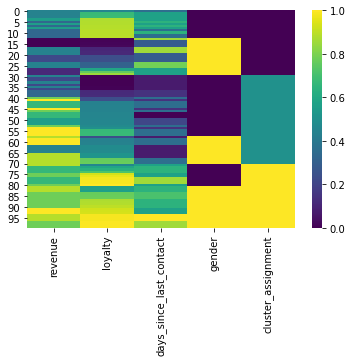

In [86]:
sns.heatmap(df, cmap='viridis')

In [88]:
case

,revenue,loyalty,days_since_last_contact,gender,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,cluster_assignment
0,4,-1.33,2,0,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,1
1,6,-0.28,3,0,"[10834,61603,62040,63288,125830]",1,0,0,0,1
2,5,-0.22,1,1,"[63288,125830]",1,0,0,0,1
3,7,-0.29,0,0,"[7881,10834]",0,1,0,0,1
4,4,1.06,5,0,"[7881,10834,62040,63288,125830]",0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
95,5,-0.22,1,1,"[63288,125830]",0,1,0,0,1
96,5,-0.29,5,0,"[63288,125830]",0,0,0,1,0
97,8,1.09,9,1,"[7881,10834]",0,0,0,1,2
98,1,-1.69,12,1,"[7881,10834,62040,63288,125830]",1,0,0,0,0


In [94]:
scaled_case = preprocessing.StandardScaler()

In [99]:
scaled_df = pd.DataFrame(scaled_case.fit_transform(case[linkage_features]))
scaled_df.columns = linkage_features

In [100]:
scaled_df

,revenue,loyalty,days_since_last_contact,gender
0,-0.962350,-1.333007,-1.113979,-0.980196
1,-0.167019,-0.280562,-0.853704,-0.980196
2,-0.564685,-0.220422,-1.374255,1.020204
3,0.230646,-0.290585,-1.634530,-0.980196
4,-0.962350,1.062558,-0.333153,-0.980196
...,...,...,...,...
95,-0.564685,-0.220422,-1.374255,1.020204
96,-0.564685,-0.290585,-0.333153,-0.980196
97,0.628311,1.092628,0.707949,1.020204
98,-2.155346,-1.693845,1.488776,1.020204


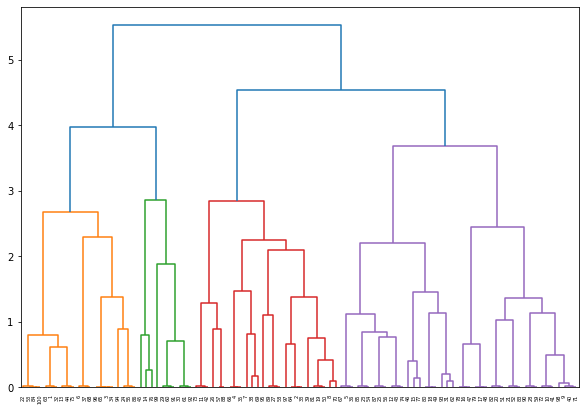

In [103]:
linked = linkage(scaled_df,'complete', 'euclidean')
labelList = range(1,101)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [101]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster_assignment = cluster.fit_predict(scaled_df)
case["cluster_assignment"] = cluster_assignment
heat_map_df = case[features].sort_values(by=["cluster_assignment","gender", "loyalty" ])
x = heat_map_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = heat_map_df.columns

<AxesSubplot:>

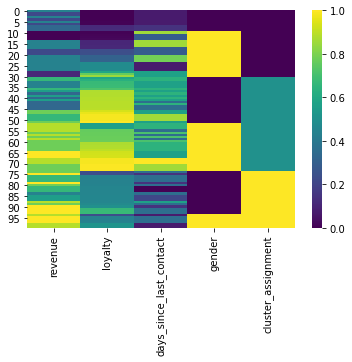

In [102]:
sns.heatmap(df, cmap='viridis')